   ### Here we are showing that  only the Xth first seconds are necessary to have a good prediction with simple features

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import os

import matplotlib.pyplot as plt

In [2]:
import csv
from collections import defaultdict
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def loop (a1):
    csv_file = '../TRAIN.CSV'
    with open(csv_file, newline='') as csv_text:
        cvs_reader = csv.reader(csv_text, delimiter=',')
        data = []
        time=[]
        for row in cvs_reader:
            
            train_dict = defaultdict(int)
        
            train_dict['id'] = row[0]
            
            train_dict['class'] = row[1]

            a1=a1
            t = 0
            state=1
            for i in range(0, len(row)): # We study just the a1 first second where a1 is the parameter of loop ( our function)
                if ('t'+str(a1)) in row[i]:
                    state=i
                    t=a1

            for k in range (0,state):
                if 'hotkey'  in row[k] and t!=0 :  
                     train_dict[row[k][:-1]] += 1/a1
                        
                if 'Base' in row[k] and t != 0:
                    train_dict['sBase'] += 1/a1
                    
                if 'Mineral' in row[k] and t != 0:
                    train_dict['sMineral'] += 1/a1
                    
                if 's' == row[k] and t != 0:
                    train_dict['s'] += 1/a1
                    

                

            train_dict['time'] = t  
         
            data.append(train_dict)



  
    df = pd.DataFrame(data, columns=train_dict.keys())
    
    
    df = df.drop(df[df.time ==  0].index) # we drop every one who has played less that a1 secondes
    
    y=df.id
    df['zerg']=0
    df['protoss']=0
    df['terran']=0

    df.loc[df['class']=='Zerg','zerg']=1
    df.loc[df['class']=='Protoss','protoss']=1
    df.loc[df['class']=='Terran','terran']=1  
    df.drop(['class'],axis=1,inplace=True)
    df.drop(['time'],axis=1,inplace=True)
    
    #df1=df.copy()
    df.drop(['id'],axis=1,inplace=True)
    X = df.fillna(0).values
    ids=y.to_numpy()
    # dividing X, y into train and test data 
    X_train, X_valid, y_train, y_valid = train_test_split(X, y,stratify= ids, test_size=0.30)
    
    #rus = RandomUnderSampler(random_state=420)
    #X_train, y_train = rus.fit_resample(X_train, y_train)
    


   
    #ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 1)

    #X_train, y_train = ada.fit_resample(X_train, y_train)
   
    #classifier = DecisionTreeClassifier(random_state=42)
    #classifier.fit(X_train,y_train)
    #y_predict = classifier.predict(X_valid)
    classifier2 = RandomForestClassifier(random_state=13, n_estimators=800)
    classifier2.fit(X_train,y_train)
    
    #df1 = df1.drop(df1[df1.id == df1.iloc[20].id ].index)
    #y_valid=list(df1.id)
    #df1.drop(['id'],axis=1,inplace=True)
    
    #X_valid = df1.fillna(0).values
    
    y_predict = classifier2.predict(X_valid)
    
    a=f1_score(y_valid, y_predict, average='micro')
            
    return a



Using TensorFlow backend.


In [3]:

res=[]
y=[]

for i in range (20,600,50): # 20 premieres secondes jusqu'aux 600 premieres ; pas =50
        y.append(loop(i))
        res.append(i)



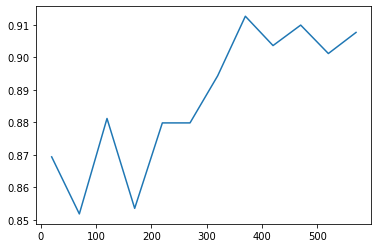

In [4]:
import matplotlib.pyplot as plt

plt.plot(res, y)

plt.show() 


### we note that for the first 20 seconds, the score reaches 0.87, and for the first 450 seconds we have a score of 0.91. the difference is just about 0.04.
### While using  adasyn (oversampling method - 45 games per player) , the accurancy increases to 0.92 for the 25th first seconds
### And when we undersampling (3 games per player) the accurancy droped to 0.86 for the 25 first seconds
### so we conclude for simple features that the average (24 games) is enough to reach 0.90 . we explored several tracks however we have not put all the codes because we write and delete code according to the need
